In [ ]:
from google.colab import files
directory.upload()

NameError: ignored

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size = (3, 3,), activation = 'relu', input_shape = (224, 224, 3)))
model_1.add(Conv2D(64, (3, 3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3,3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(
    loss = keras.losses.binary_crossentropy,
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
train_datagen = image.ImageDataGenerator (
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory (
    '/content/drive/MyDrive/Covid-19_Dataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
rmdir /content/drive/MyDrive/Covid-19_Dataset/Test/.ipynb_checkpoints 

rmdir: failed to remove '/content/drive/MyDrive/Covid-19_Dataset/Test/.ipynb_checkpoints': No such file or directory


In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Covid-19_Dataset/Test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


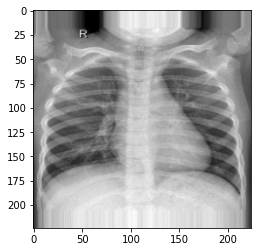

In [ ]:
x_1, y_1 = next(iter(train_generator))
image = x_1
plt.imshow(x_1[0])
#y_1[12]
#x_1.shape

In [ ]:
rmdir /content/Covid_Dataset/Test/.ipynb_checkpoints 

rmdir: failed to remove '/content/Covid_Dataset/Test/.ipynb_checkpoints': No such file or directory


In [ ]:
import numpy as np
#import tensorflow.keras.utils.np_utils
x_train_test, y_train_test = next(iter(validation_generator))
tfmodel_predictions_11 = model_1.predict(x_1)
threshold = 0.5
prediction_classes = np.where(tfmodel_predictions_11 > threshold, 1,0)
prediction_classes.squeeze()

#len(tfmodel_predictions_11)
#prediction_classes = np.argmax(predictions_11, axis = 1)
#prediction_classes

1/1 [==============================] - 0s 118ms/step


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
#load the image
#my_image = load_img('/content/drive/MyDrive/Covid-19_Dataset/Test/Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg', target_size=(224, 224))

#preprocess the image
#my_image = img_to_array(my_image)
#my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
#my_image = preprocess_input(my_image)


#make the prediction
prediction = model_1.predict(x_1[0].reshape(1,224, 224, 3))
prediction
#x_1[0].reshape(1, 224, 224, 3)

1/1 [==============================] - 0s 246ms/step


array([[0.01159845]], dtype=float32)

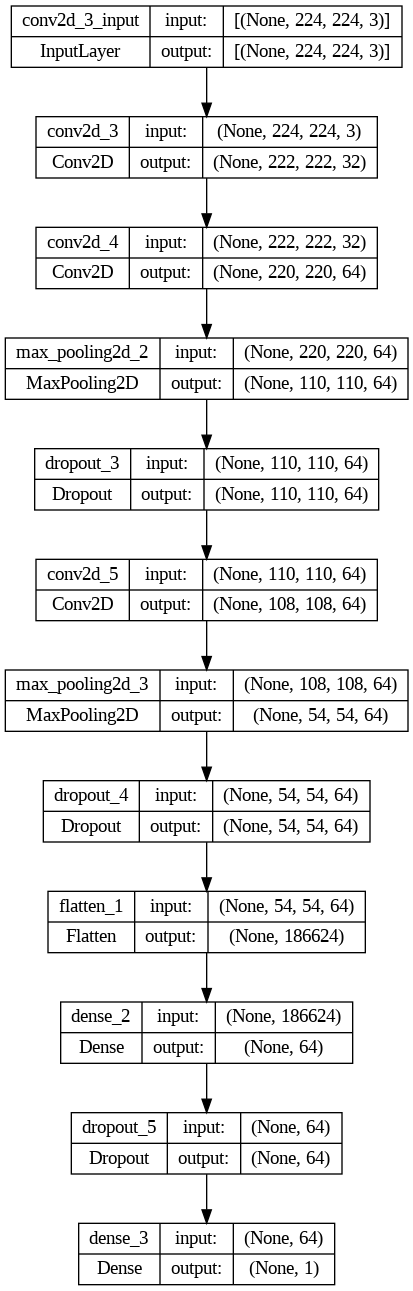

In [ ]:
from tensorflow.keras.utils import plot_model 

plot_model(model = model_1, show_shapes =True)


In [ ]:
model_1.evaluate(validation_generator)

2/2 [==============================] - 2s 692ms/step - loss: 0.0785 - accuracy: 0.9833


[0.07852938771247864, 0.9833333492279053]

In [ ]:
#x_1[0].shape
#res = image.ImageDataGenerator(rescale = 1./255)
#res.apply_transform(x_1[7])
#test_1 = model_1.predict(x_1[12].reshape(-1, 224, 224, 3))
#test_1
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
#load the image
my_image = load_img('/content/drive/MyDrive/Covid-19_Dataset/Test/Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg', target_size=(224, 224))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model_1.predict(my_image)
prediction
print(my_image.shape)

1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 3)


In [ ]:
model_1.save('tf_model_1.h5')

In [ ]:

import os
os.stat('tf_model_1.h5').st_size

144060632

In [ ]:
size = os.path.getsize('tf_model_1.h5')
size

144060632

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
convert_bytes(size, "MB")

File size: 137.387 Megabytes


In [ ]:
model_1.save("/content/sample_data/model_1.h5")

## **Post-Training-Quantization**

Post-Train Float-16 quantization

In [ ]:
#converter = tf.lite.TFLiteConverter.from_saved_model('/content/model_1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()

In [ ]:
type(tflite_quant_model)
import pathlib

In [ ]:
tflite_models_dir = pathlib.Path("/content/sample_data")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
tflite_opt_model_file = tflite_models_dir/"tflite_noopt_post.tflite"
tflite_opt_model_file.write_bytes(tflite_quant_model)

48005332

In [ ]:
type(tflite_model_file)

pathlib.PosixPath

In [ ]:
tflite_post_model_name = 'tflite_post_training.tflite'
open(tflite_post_model_name, 'wb').write(tflite_quant_model)

48005332

In [ ]:
type(tflite_quant_model)

bytes

In [ ]:
convert_bytes(os.path.getsize(tflite_post_model_name), "MB")

File size: 45.781 Megabytes


Validating Post-Quantization model

In [ ]:
interpreter = tf.lite.Interpreter(model_path = tflite_post_model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input shape expected: ", input_details[0]['shape'])
print("Input dtype expected: ", input_details[0]['dtype'])
print("Output shape expected: ", output_details[0]['shape'])
print('Output type expected: ', output_details[0]['dtype'])
#input_details[0]['shape']

Input shape expected:  [  1 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [1 1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (1,))
interpreter.allocate_tensors()
input_details_1 = interpreter.get_input_details()
output_details_1 = interpreter.get_output_details()
print("Input shape expected: ", input_details_1[0]['shape'])
print("Input dtype expected: ", input_details_1[0]['dtype'])
print("Output shape expected: ", output_details_1[0]['shape'])
print('Output type expected: ', output_details_1[0]['dtype'])

Input shape expected:  [ 32 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [32  1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter.set_tensor(input_details[0]['index'], x_1)
interpreter.invoke()
tflite_quant_model_predictions = interpreter.get_tensor(output_details[0]['index'])
tflite_quant_model_predictions
#prediction_classes

array([[5.7926136e-03],
       [2.9117952e-03],
       [9.9783307e-01],
       [9.3172140e-02],
       [9.9926728e-01],
       [6.8550467e-01],
       [8.1819755e-01],
       [9.8641896e-01],
       [1.4383240e-01],
       [3.1171519e-02],
       [4.5037267e-04],
       [8.0514300e-01],
       [9.6733832e-01],
       [1.6002387e-02],
       [9.9921232e-01],
       [5.6495324e-02],
       [3.1504709e-02],
       [2.4666632e-02],
       [1.1150636e-01],
       [9.9886435e-01],
       [2.7303912e-02],
       [9.9950677e-01],
       [9.6030462e-01],
       [9.5177788e-01],
       [3.9879736e-02],
       [9.9229753e-01],
       [1.4965686e-03],
       [9.9784553e-01],
       [4.2327544e-01],
       [1.0585941e-02],
       [9.7508335e-01],
       [9.8849529e-01]], dtype=float32)

## **Quantization-Aware-Training**

In [ ]:
! pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 5.9 MB/s eta 0:00:00


In [ ]:
import tensorflow_model_optimization as tfmot

quantized_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantized_model(model_1)

q_aware_model.compile(
    loss = keras.losses.binary_crossentropy,
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
quant_final = q_aware_model.fit_generator (
    train_generator, 
    #steps_per_epoch = 2,
    epochs = 1,
    validation_data = validation_generator,
    validation_steps = 2
)

<ipython-input-25-a2925e8f4fa1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  quant_final = q_aware_model.fit_generator (


9/9 [==============================] - 16s 2s/step - loss: 0.2461 - accuracy: 0.8993 - val_loss: 0.1125 - val_accuracy: 0.9667


In [ ]:
q_aware_model.evaluate(validation_generator)

2/2 [==============================] - 2s 773ms/step - loss: 0.1125 - accuracy: 0.9667


[0.11247142404317856, 0.9666666388511658]

In [ ]:
converter_1 = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter_1.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_aware_model = converter_1.convert()

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
convert_bytes(len(tflite_quant_aware_model), "MB")

File size: 11.454 Megabytes


In [ ]:
tflite_models_dir = pathlib.Path("/content/sample_data")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
tflite_quant_model_file = tflite_models_dir/"tflite_quant_aware.tflite"
tflite_quant_model_file.write_bytes(tflite_quant_aware_model)

12010440

In [ ]:
tflite_model_name_1 = 'tflite_qat_model.tflite'
open(tflite_model_name_1, 'wb').write(tflite_quant_aware_model)

12010440

Validating QAT model

In [ ]:
interpreter_1 = tf.lite.Interpreter(model_path = tflite_model_name_1)
input_details = interpreter_1.get_input_details()
output_details = interpreter_1.get_output_details()
print("Input shape expected: ", input_details[0]['shape'])
print("Input dtype expected: ", input_details[0]['dtype'])
print("Output shape expected: ", output_details[0]['shape'])
print('Output type expected: ', output_details[0]['dtype'])

Input shape expected:  [  1 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [1 1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_1.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter_1.resize_tensor_input(output_details[0]['index'], (1, ))
interpreter_1.allocate_tensors()
input_details_11 = interpreter_1.get_input_details()
output_details_11 = interpreter_1.get_output_details()
print("Input shape expected: ", input_details_11[0]['shape'])
print("Input dtype expected: ", input_details_11[0]['dtype'])
print("Output shape expected: ", output_details_11[0]['shape'])
print('Output type expected: ', output_details_11[0]['dtype'])

Input shape expected:  [ 32 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [32  1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_1.set_tensor(input_details_11[0]['index'], x_1)
interpreter_1.invoke()
tflite_quant_aware_model_prediction = interpreter_1.get_tensor(output_details_11[0]['index'])
#prediction_classes = np.argmax(tflite_model_prediction_1, axis = 1)
tflite_quant_aware_model_prediction
#prediction_classes

array([[0.0390625 ],
       [0.06640625],
       [0.94921875],
       [0.30859375],
       [0.98046875],
       [0.55859375],
       [0.63671875],
       [0.92578125],
       [0.203125  ],
       [0.08203125],
       [0.0234375 ],
       [0.6171875 ],
       [0.8125    ],
       [0.12109375],
       [0.98046875],
       [0.171875  ],
       [0.109375  ],
       [0.1484375 ],
       [0.21875   ],
       [0.9765625 ],
       [0.09375   ],
       [0.98046875],
       [0.7890625 ],
       [0.828125  ],
       [0.1875    ],
       [0.89453125],
       [0.03515625],
       [0.9296875 ],
       [0.3828125 ],
       [0.05859375],
       [0.828125  ],
       [0.83203125]], dtype=float32)

In [ ]:
comparison_dataframe = pd.DataFrame({"TF_Model":tfmodel_predictions_11.squeeze(), "TFLite_Post_Training_Model":tflite_quant_model_predictions.squeeze(), "TFLite_Quant_Aware_Model":tflite_quant_aware_model_prediction.squeeze()})
comparison_dataframe

,TF_Model,TFLite_Post_Training_Model,TFLite_Quant_Aware_Model
0,0.005793,0.005793,0.039062
1,0.002912,0.002912,0.066406
2,0.997833,0.997833,0.949219
3,0.093171,0.093172,0.308594
4,0.999267,0.999267,0.980469
5,0.685504,0.685505,0.558594
6,0.818198,0.818198,0.636719
7,0.986419,0.986419,0.925781
8,0.143832,0.143832,0.203125
9,0.031172,0.031172,0.082031


In [ ]:
threshold = 0.5
tfmodel_labels = np.where(tfmodel_predictions_11 > 0.5, 1, 0)
tflite_post_labels = np.where(tflite_quant_model_predictions > 0.5, 1, 0)
tflite_qat_labels = np.where(tflite_quant_aware_model_prediction > 0.5, 1, 0)

In [ ]:
tfmodel_labels.squeeze()

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
tflite_post_labels.squeeze()

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
tflite_qat_labels.squeeze()

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
tfmodel_accuracy = accuracy_score(y_1, tfmodel_labels)
tflite_post_accuracy = accuracy_score(y_1, tflite_post_labels)
tflite_qat_accuracy = accuracy_score(y_1,tflite_qat_labels)

In [ ]:
accuracy_df = pd.DataFrame({"Model":["TensorFlow Model", "TF Post Training Model", "TF QAT Model"], "Accuracy":[tfmodel_accuracy, tflite_post_accuracy, tflite_qat_accuracy]})
accuracy_df

,Model,Accuracy
0,TensorFlow Model,0.90625
1,TF Post Training Model,0.90625
2,TF QAT Model,0.90625


In [ ]:
! mkdir TFModels

In [ ]:
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
test_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Covid-19_Dataset/Test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


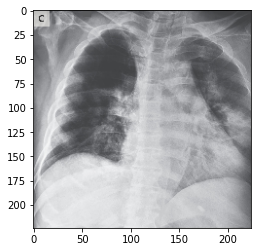

In [ ]:
x_1, y_1 = next(test_generator)
plt.imshow(x_1[0])

In [ ]:
tf_model = tf.keras.models.load_model('/content/TFModels/tf_model_1.h5')

Post Training Conversion to TFLite without any quantization

In [ ]:
interpreter_1 = interpreter = tf.lite.Interpreter(model_path='/content/tflite_noopt_post.tflite')
interpreter_1.allocate_tensors()

In [ ]:
input_details = interpreter_1.get_input_details()
output_details = interpreter_1.get_output_details()
print("Input shape expected: ", input_details[0]['shape'])
print("Input dtype expected: ", input_details[0]['dtype'])
print("Output shape expected: ", output_details[0]['shape'])
print('Output type expected: ', output_details[0]['dtype'])

Input shape expected:  [  1 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [1 1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_1.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter_1.resize_tensor_input(output_details[0]['index'], (1,))
interpreter_1.allocate_tensors()
input_details_1 = interpreter.get_input_details()
output_details_1 = interpreter.get_output_details()
print("Input shape expected: ", input_details_1[0]['shape'])
print("Input dtype expected: ", input_details_1[0]['dtype'])
print("Output shape expected: ", output_details_1[0]['shape'])
print('Output type expected: ', output_details_1[0]['dtype'])

Input shape expected:  [ 32 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [32  1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_1.set_tensor(input_details[0]['index'], x_1)

In [ ]:
from time import time

In [ ]:
time_before = time()
interpreter_1.invoke()
time_after = time()

In [ ]:
time_taken_1 = time_after-time_before
time_taken_1

2.662261962890625

TensorFlow Model

In [ ]:
from keras.models import load_model

In [ ]:
tf_model = load_model('/content/tf_model_1.h5')

In [ ]:
time_before_1 = time()
tf_model.predict(x_1)
time_after_1 = time()

1/1 [==============================] - 2s 2s/step


In [ ]:
time_taken_2 = time_after_1 - time_before_1
time_taken_2

2.547246217727661

Post Training with Float16 weights

In [ ]:
interpreter_2 = tf.lite.Interpreter(model_path = '/content/tflite_quant_post.tflite')
interpreter_2.allocate_tensors()

In [ ]:
input_details = interpreter_2.get_input_details()
output_details = interpreter_2.get_output_details()
print("Input shape expected: ", input_details[0]['shape'])
print("Input dtype expected: ", input_details[0]['dtype'])
print("Output shape expected: ", output_details[0]['shape'])
print('Output type expected: ', output_details[0]['dtype'])

Input shape expected:  [  1 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [1 1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_2.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter_2.resize_tensor_input(output_details[0]['index'], (1,))
interpreter_2.allocate_tensors()
input_details_11 = interpreter_2.get_input_details()
output_details_11 = interpreter_2.get_output_details()
print("Input shape expected: ", input_details_11[0]['shape'])
print("Input dtype expected: ", input_details_11[0]['dtype'])
print("Output shape expected: ", output_details_11[0]['shape'])
print('Output type expected: ', output_details_11[0]['dtype'])

Input shape expected:  [ 32 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [32  1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_2.set_tensor(input_details_11[0]['index'], x_1)

In [ ]:
time_before_11 = time()
interpreter_2.invoke()
time_after_11 = time()

In [ ]:
time_taken_3 = time_after_11 - time_before_11
time_taken_3

3.0686593055725098

Quantization-Aware-Training

In [ ]:
interpreter_3 = tf.lite.Interpreter(model_path = '/content/tflite_quant_aware.tflite')
interpreter_3.allocate_tensors()

In [ ]:
input_details = interpreter_3.get_input_details()
output_details = interpreter_3.get_output_details()
print("Input shape expected: ", input_details[0]['shape'])
print("Input dtype expected: ", input_details[0]['dtype'])
print("Output shape expected: ", output_details[0]['shape'])
print('Output type expected: ', output_details[0]['dtype'])

Input shape expected:  [  1 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [1 1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_3.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
interpreter_3.resize_tensor_input(output_details[0]['index'], (1,))
interpreter_3.allocate_tensors()
input_details_111 = interpreter_3.get_input_details()
output_details_111 = interpreter_3.get_output_details()
print("Input shape expected: ", input_details_111[0]['shape'])
print("Input dtype expected: ", input_details_111[0]['dtype'])
print("Output shape expected: ", output_details_111[0]['shape'])
print('Output type expected: ', output_details_111[0]['dtype'])

Input shape expected:  [ 32 224 224   3]
Input dtype expected:  <class 'numpy.float32'>
Output shape expected:  [32  1]
Output type expected:  <class 'numpy.float32'>


In [ ]:
interpreter_3.set_tensor(input_details_11[0]['index'], x_1)

In [ ]:
time_before_111 = time()
interpreter_3.invoke()
time_after_111 = time()

In [ ]:
time_taken_4 = time_after_111 - time_before_111
time_taken_4

3.6345322132110596

Time Comparison

In [ ]:
import pandas as pd 
time_df = pd.DataFrame({'Model':['TFLite without opt', 'TF','TFLite with Float16 weights',  'TFLite QAT'], 'Time':[time_taken_1, time_taken_2, time_taken_3, time_taken_4,, "MB")]]})

In [ ]:
time_df

,Model,Time
0,TFLite without opt,2.662262
1,TF,2.547246
2,TFLite with Float16 weights,3.068659
3,TFLite QAT,3.634532
